In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# 获取训练数据
my_data = pd.read_csv("./data/train_V2.csv")

In [320]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [321]:
# 数据基本处理
my_data.shape

(4446966, 29)

In [323]:
# 处理缺失值
np.any((np.any(pd.isna(my_data))) or (np.any(pd.isnull(my_data))))

True

In [329]:
my_data.dropna(inplace=True)

In [333]:
# 判断是否处理完缺失值
np.any((np.any(pd.isna(my_data))) or (np.any(pd.isnull(my_data))))

False

In [332]:
my_data.shape

(4446965, 29)

In [334]:
data = my_data.iloc[:50000,:]

In [ ]:
# 查看每场比赛参加的人数

In [336]:
count = data.groupby("matchId")['matchId'].transform("count")

In [337]:
data['player_joined'] = count

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [343]:
np.max(data['player_joined'])

7

In [ ]:
# 特征规范化处理

In [302]:
data.dropna(inplace=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [303]:
data.shape

(10000, 29)

In [305]:
data['matchType'].head(20)

0     squad-fpp
1     squad-fpp
2           duo
3     squad-fpp
4      solo-fpp
5     squad-fpp
6     squad-fpp
7      solo-fpp
8         squad
9         squad
10    squad-fpp
11      duo-fpp
12    squad-fpp
13     solo-fpp
14    squad-fpp
15      duo-fpp
16    squad-fpp
17     solo-fpp
18    squad-fpp
19    squad-fpp
Name: matchType, dtype: object

In [306]:
matchType = data['matchType']

In [307]:
matchType_col = pd.get_dummies(matchType)

In [308]:
matchType_col.head()

,crashfpp,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [309]:
data = pd.concat([data,matchType_col],axis=1)

In [310]:
data['numGroups'].sort_values().head()

3826    1
846     1
6771    2
2640    2
3962    2
Name: numGroups, dtype: int64

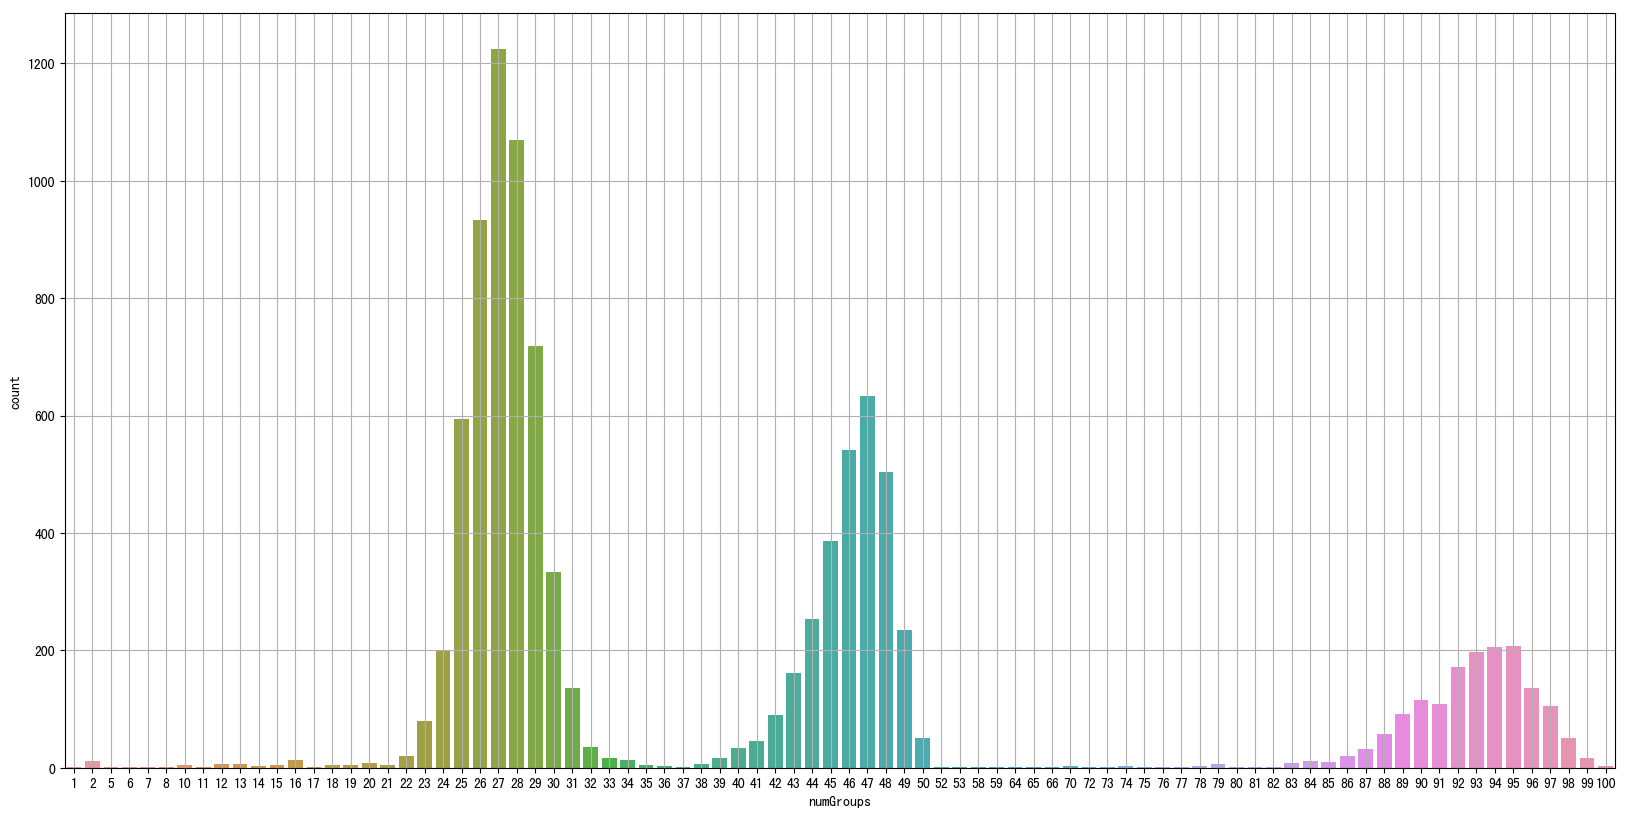

In [311]:
# 绘制图像，查看每局开始人数
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(data['numGroups'])
plt.grid()
plt.show()

In [312]:
print(data.columns)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'crashfpp', 'crashtpp',
       'duo', 'duo-fpp', 'flarefpp', 'flaretpp', 'normal-duo',
       'normal-duo-fpp', 'normal-solo-fpp', 'normal-squad', 'normal-squad-fpp',
       'solo', 'solo-fpp', 'squad', 'squad-fpp'],
      dtype='object')


In [313]:
# 确定特征值和目标值
y = data['winPlacePerc']
x = data[["assists","boosts","damageDealt","DBNOs",
          "headshotKills","heals","killPlace","killPoints", 
          "kills","killStreaks","longestKill","matchDuration",
          "maxPlace","numGroups","rankPoints", 'solo','duo','squad']]

In [314]:
y.head()

0    0.4444
1    0.6400
2    0.7755
3    0.1667
4    0.1875
Name: winPlacePerc, dtype: float64

In [315]:
# 数据切割
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [316]:
# 特征工程
# 数据标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

## 算法 线性回归梯度下降法

In [317]:
# 建立模型 线性回归 梯度下降法
# estimator = SGDRegressor(max_iter=1000)
estimator = SGDRegressor(max_iter=1000,learning_rate="constant",eta0=0.0001)
estimator.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [318]:
# 项目评估方式
# 你必须创建一个模型，根据他们的最终统计数据预测玩家的排名，从1（第一名）到0（最后一名）。
# 最后结果通过平均绝对误差（MAE）进行评估，即通过预测的winPlacePerc和真实的winPlacePerc之间的平均绝对误差
# 关于MAE:
# sklearn.metrics.mean_absolute_error

# 5.模型评估
# 5.1 获取系数等值
y_predict = estimator.predict(x_test)
print(estimator.score(x_test,y_test))
# 5.2 评价
# 平均绝对误差（MAE）
error = mean_absolute_error(y_test, y_predict)
print("误差为:\n", error)

0.7308610971623919
误差为:
 0.11806823158248607


In [319]:
# 查看特征的重要性
# estimator.feature_importances_

AttributeError: 'SGDRegressor' object has no attribute 'feature_importances_'